# Assessment 2 - Part 1: Machine Learning

### Task 1.1 - Data Preparation

#### Importing libraries

In [27]:
## Imports

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

## Used for normalising the data
from sklearn.preprocessing import MinMaxScaler

## Used for regression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

## Used for assessment of regression
from sklearn.metrics import mean_squared_error

## Used for cross validation
import pandas 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#### Loading and preparing the dataset

In [28]:
data = pandas.read_excel("data.xlsx")
print(data)

## Extracting Data
inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)

# Scale the data.
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)


# Project the data into two dimensions using PCA.
pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

# Print the range of the variables to show the normalisation effect.
print(inputs.ptp(axis=0))
print(scaled.ptp(axis=0))

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]
[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1. 1. 1. 1. 1. 1. 1. 1.]


#### Training the data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    scaled, targets, test_size=0.1, random_state=2)

### Task 1.2 - Regression

#### Regression using the "sklearn.neural_network.MLPRegressor"

In [30]:
neural_Regressor = MLPRegressor(hidden_layer_sizes=(20,), max_iter=2100, warm_start=True, random_state = 1, verbose=True)
neural_Regressor.fit(scaled, targets)
neural_Outputs = neural_Regressor.predict(scaled)

Iteration 1, loss = 325.05253750
Iteration 2, loss = 323.77349169
Iteration 3, loss = 322.50041281
Iteration 4, loss = 321.22494524
Iteration 5, loss = 319.96371645
Iteration 6, loss = 318.69544974
Iteration 7, loss = 317.41874981
Iteration 8, loss = 316.09939079
Iteration 9, loss = 314.77429767
Iteration 10, loss = 313.39562967
Iteration 11, loss = 311.97342916
Iteration 12, loss = 310.48533198
Iteration 13, loss = 308.93078235
Iteration 14, loss = 307.32083361
Iteration 15, loss = 305.61955432
Iteration 16, loss = 303.83749606
Iteration 17, loss = 301.95978544
Iteration 18, loss = 299.99220317
Iteration 19, loss = 297.92984181
Iteration 20, loss = 295.80540963
Iteration 21, loss = 293.55515591
Iteration 22, loss = 291.23669876
Iteration 23, loss = 288.81797355
Iteration 24, loss = 286.35978798
Iteration 25, loss = 283.79332266
Iteration 26, loss = 281.15697277
Iteration 27, loss = 278.46228684
Iteration 28, loss = 275.76442200
Iteration 29, loss = 272.97125102
Iteration 30, loss = 27

Iteration 269, loss = 7.17711917
Iteration 270, loss = 7.15318665
Iteration 271, loss = 7.12783520
Iteration 272, loss = 7.10270096
Iteration 273, loss = 7.08062482
Iteration 274, loss = 7.05793559
Iteration 275, loss = 7.03401175
Iteration 276, loss = 7.01248932
Iteration 277, loss = 6.99205188
Iteration 278, loss = 6.97063900
Iteration 279, loss = 6.94958767
Iteration 280, loss = 6.92929242
Iteration 281, loss = 6.90893695
Iteration 282, loss = 6.89010202
Iteration 283, loss = 6.87238769
Iteration 284, loss = 6.85229401
Iteration 285, loss = 6.83404792
Iteration 286, loss = 6.81602944
Iteration 287, loss = 6.79834508
Iteration 288, loss = 6.78113475
Iteration 289, loss = 6.76343211
Iteration 290, loss = 6.74632970
Iteration 291, loss = 6.73083146
Iteration 292, loss = 6.71321539
Iteration 293, loss = 6.69794006
Iteration 294, loss = 6.68156187
Iteration 295, loss = 6.66485477
Iteration 296, loss = 6.64949154
Iteration 297, loss = 6.63413888
Iteration 298, loss = 6.61896143
Iteration 

Iteration 536, loss = 5.41716612
Iteration 537, loss = 5.41619360
Iteration 538, loss = 5.41390374
Iteration 539, loss = 5.41201347
Iteration 540, loss = 5.41027509
Iteration 541, loss = 5.40854957
Iteration 542, loss = 5.40656576
Iteration 543, loss = 5.40472184
Iteration 544, loss = 5.40322726
Iteration 545, loss = 5.40215554
Iteration 546, loss = 5.40029134
Iteration 547, loss = 5.39797083
Iteration 548, loss = 5.39649221
Iteration 549, loss = 5.39504714
Iteration 550, loss = 5.39296950
Iteration 551, loss = 5.39146812
Iteration 552, loss = 5.39075895
Iteration 553, loss = 5.38867858
Iteration 554, loss = 5.38693347
Iteration 555, loss = 5.38599804
Iteration 556, loss = 5.38311443
Iteration 557, loss = 5.38137505
Iteration 558, loss = 5.38000530
Iteration 559, loss = 5.37776081
Iteration 560, loss = 5.37654278
Iteration 561, loss = 5.37485769
Iteration 562, loss = 5.37396394
Iteration 563, loss = 5.37189529
Iteration 564, loss = 5.37031929
Iteration 565, loss = 5.36984448
Iteration 

Iteration 793, loss = 5.01221220
Iteration 794, loss = 5.01037625
Iteration 795, loss = 5.00966868
Iteration 796, loss = 5.00723679
Iteration 797, loss = 5.00537537
Iteration 798, loss = 5.00495802
Iteration 799, loss = 5.00513650
Iteration 800, loss = 5.00122369
Iteration 801, loss = 4.99977253
Iteration 802, loss = 4.99833388
Iteration 803, loss = 4.99684531
Iteration 804, loss = 4.99600222
Iteration 805, loss = 4.99349151
Iteration 806, loss = 4.99239698
Iteration 807, loss = 4.99139877
Iteration 808, loss = 4.98899472
Iteration 809, loss = 4.98821747
Iteration 810, loss = 4.98582150
Iteration 811, loss = 4.98440007
Iteration 812, loss = 4.98379543
Iteration 813, loss = 4.98149593
Iteration 814, loss = 4.98011332
Iteration 815, loss = 4.97806006
Iteration 816, loss = 4.97705158
Iteration 817, loss = 4.97637318
Iteration 818, loss = 4.97437017
Iteration 819, loss = 4.97300801
Iteration 820, loss = 4.97108897
Iteration 821, loss = 4.97416960
Iteration 822, loss = 4.96848885
Iteration 

Iteration 1078, loss = 4.57166032
Iteration 1079, loss = 4.57279741
Iteration 1080, loss = 4.56844718
Iteration 1081, loss = 4.56682587
Iteration 1082, loss = 4.56543137
Iteration 1083, loss = 4.56718465
Iteration 1084, loss = 4.56298005
Iteration 1085, loss = 4.56299001
Iteration 1086, loss = 4.56011923
Iteration 1087, loss = 4.55916703
Iteration 1088, loss = 4.55785698
Iteration 1089, loss = 4.55778223
Iteration 1090, loss = 4.55547039
Iteration 1091, loss = 4.55694736
Iteration 1092, loss = 4.55235182
Iteration 1093, loss = 4.55143372
Iteration 1094, loss = 4.55010317
Iteration 1095, loss = 4.54970855
Iteration 1096, loss = 4.54768190
Iteration 1097, loss = 4.54639063
Iteration 1098, loss = 4.54615934
Iteration 1099, loss = 4.54469253
Iteration 1100, loss = 4.54506346
Iteration 1101, loss = 4.54116109
Iteration 1102, loss = 4.54032659
Iteration 1103, loss = 4.53883692
Iteration 1104, loss = 4.53711756
Iteration 1105, loss = 4.53652343
Iteration 1106, loss = 4.53436696
Iteration 1107

Iteration 1341, loss = 4.32230140
Iteration 1342, loss = 4.32084065
Iteration 1343, loss = 4.31810286
Iteration 1344, loss = 4.31931650
Iteration 1345, loss = 4.31990482
Iteration 1346, loss = 4.31705873
Iteration 1347, loss = 4.31593056
Iteration 1348, loss = 4.32278993
Iteration 1349, loss = 4.31689538
Iteration 1350, loss = 4.31529927
Iteration 1351, loss = 4.31364956
Iteration 1352, loss = 4.31358565
Iteration 1353, loss = 4.31333267
Iteration 1354, loss = 4.31295874
Iteration 1355, loss = 4.31167724
Iteration 1356, loss = 4.31172496
Iteration 1357, loss = 4.31081521
Iteration 1358, loss = 4.31082391
Iteration 1359, loss = 4.31040677
Iteration 1360, loss = 4.31067857
Iteration 1361, loss = 4.30848472
Iteration 1362, loss = 4.30821491
Iteration 1363, loss = 4.30783300
Iteration 1364, loss = 4.30749381
Iteration 1365, loss = 4.30623942
Iteration 1366, loss = 4.30646517
Iteration 1367, loss = 4.30569334
Iteration 1368, loss = 4.30604466
Iteration 1369, loss = 4.30475621
Iteration 1370

Iteration 1584, loss = 4.22848486
Iteration 1585, loss = 4.22924214
Iteration 1586, loss = 4.22963507
Iteration 1587, loss = 4.22856707
Iteration 1588, loss = 4.22891663
Iteration 1589, loss = 4.22937147
Iteration 1590, loss = 4.22784895
Iteration 1591, loss = 4.22818682
Iteration 1592, loss = 4.22700579
Iteration 1593, loss = 4.22691652
Iteration 1594, loss = 4.22657455
Iteration 1595, loss = 4.22743472
Iteration 1596, loss = 4.22918776
Iteration 1597, loss = 4.22600723
Iteration 1598, loss = 4.22723927
Iteration 1599, loss = 4.22863856
Iteration 1600, loss = 4.22633723
Iteration 1601, loss = 4.22598586
Iteration 1602, loss = 4.22667936
Iteration 1603, loss = 4.22490009
Iteration 1604, loss = 4.22413145
Iteration 1605, loss = 4.22495003
Iteration 1606, loss = 4.22567552
Iteration 1607, loss = 4.22336156
Iteration 1608, loss = 4.22442744
Iteration 1609, loss = 4.22431550
Iteration 1610, loss = 4.22330231
Iteration 1611, loss = 4.22220810
Iteration 1612, loss = 4.22381585
Iteration 1613

Iteration 1835, loss = 4.18892563
Iteration 1836, loss = 4.18883754
Iteration 1837, loss = 4.18892045
Iteration 1838, loss = 4.18762099
Iteration 1839, loss = 4.18756133
Iteration 1840, loss = 4.18788319
Iteration 1841, loss = 4.18793928
Iteration 1842, loss = 4.18962123
Iteration 1843, loss = 4.18902662
Iteration 1844, loss = 4.18602100
Iteration 1845, loss = 4.18689984
Iteration 1846, loss = 4.18859687
Iteration 1847, loss = 4.18766777
Iteration 1848, loss = 4.18727840
Iteration 1849, loss = 4.18752441
Iteration 1850, loss = 4.18732069
Iteration 1851, loss = 4.18640741
Iteration 1852, loss = 4.18626903
Iteration 1853, loss = 4.18650772
Iteration 1854, loss = 4.18548375
Iteration 1855, loss = 4.18579507
Iteration 1856, loss = 4.18577679
Iteration 1857, loss = 4.18767458
Iteration 1858, loss = 4.18527343
Iteration 1859, loss = 4.18564568
Iteration 1860, loss = 4.18486609
Iteration 1861, loss = 4.18689139
Iteration 1862, loss = 4.19256277
Iteration 1863, loss = 4.18786047
Iteration 1864

#### Regression using the "sklearn.ensemble.RandomForestRegressor"

In [31]:
randomForest_Regressor = RandomForestRegressor(max_depth=2, warm_start=True, random_state = 1, verbose=True)
randomForest_Regressor.fit(scaled, targets)
rf_Outputs = randomForest_Regressor.predict(scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Regression using the "sklearn.svm.SVR"

In [32]:
#SVR_Regressor = SVR(kernel='rbf')
#SVR_Regressor.fit(targets, scaled)
#SVR_Outputs = SVR_Regressor.predict(scaled)

### Task 1.3 - Assessment of  Regression

#### MSE of all 3 regression methods then plot it on a box plot

Iteration 1, loss = 44898.90860609
Iteration 2, loss = 39640.69220676
Iteration 3, loss = 34769.06758418
Iteration 4, loss = 30266.78533653
Iteration 5, loss = 26149.26758516
Iteration 6, loss = 22394.37234969
Iteration 7, loss = 19011.17660277
Iteration 8, loss = 16000.81598004
Iteration 9, loss = 13342.97807612
Iteration 10, loss = 11005.84856636
Iteration 11, loss = 8974.17390801
Iteration 12, loss = 7242.96760810
Iteration 13, loss = 5775.38891239
Iteration 14, loss = 4550.90511576
Iteration 15, loss = 3543.52567047
Iteration 16, loss = 2729.21264401
Iteration 17, loss = 2077.02057751
Iteration 18, loss = 1570.83959770
Iteration 19, loss = 1181.20758795
Iteration 20, loss = 895.31132570
Iteration 21, loss = 686.93645215
Iteration 22, loss = 535.26205313
Iteration 23, loss = 432.21752701
Iteration 24, loss = 361.37095443
Iteration 25, loss = 319.00429158
Iteration 26, loss = 291.92263371
Iteration 27, loss = 276.84202069
Iteration 28, loss = 268.56354596
Iteration 29, loss = 263.485

Iteration 257, loss = 14.41354373
Iteration 258, loss = 14.31262496
Iteration 259, loss = 14.54359928
Iteration 260, loss = 14.26958018
Iteration 261, loss = 14.30583736
Iteration 262, loss = 14.24104812
Iteration 263, loss = 14.16323688
Iteration 264, loss = 14.19009154
Iteration 265, loss = 14.23289443
Iteration 266, loss = 14.16360530
Iteration 267, loss = 14.13731042
Iteration 268, loss = 14.16626653
Iteration 269, loss = 14.26999186
Iteration 270, loss = 14.40559672
Iteration 271, loss = 14.22679752
Iteration 272, loss = 14.22268322
Iteration 273, loss = 14.23841837
Iteration 274, loss = 14.15135423
Iteration 275, loss = 14.13416001
Iteration 276, loss = 14.42359871
Iteration 277, loss = 14.16809022
Iteration 278, loss = 14.23907376
Iteration 279, loss = 14.04658856
Iteration 280, loss = 14.18718594
Iteration 281, loss = 14.13558422
Iteration 282, loss = 14.05808089
Iteration 283, loss = 14.18375623
Iteration 284, loss = 14.09942718
Iteration 285, loss = 14.00970178
Iteration 286,

Iteration 133, loss = 20.35394357
Iteration 134, loss = 20.06039605
Iteration 135, loss = 20.14855252
Iteration 136, loss = 19.62071404
Iteration 137, loss = 19.31723318
Iteration 138, loss = 19.30557401
Iteration 139, loss = 18.86682180
Iteration 140, loss = 18.62146046
Iteration 141, loss = 18.76767083
Iteration 142, loss = 18.38988437
Iteration 143, loss = 18.85643305
Iteration 144, loss = 18.07654475
Iteration 145, loss = 18.02364284
Iteration 146, loss = 17.55735431
Iteration 147, loss = 17.53698565
Iteration 148, loss = 17.50525445
Iteration 149, loss = 17.31066227
Iteration 150, loss = 17.17007646
Iteration 151, loss = 17.19438086
Iteration 152, loss = 17.04803916
Iteration 153, loss = 16.87506184
Iteration 154, loss = 16.80330065
Iteration 155, loss = 16.79852968
Iteration 156, loss = 16.70578398
Iteration 157, loss = 17.08019542
Iteration 158, loss = 16.99844999
Iteration 159, loss = 16.69869333
Iteration 160, loss = 16.67142422
Iteration 161, loss = 16.68227917
Iteration 162,

Iteration 1, loss = 44566.98176525
Iteration 2, loss = 39321.01776218
Iteration 3, loss = 34498.08216339
Iteration 4, loss = 30034.94553583
Iteration 5, loss = 25938.83273977
Iteration 6, loss = 22224.20894060
Iteration 7, loss = 18850.76875071
Iteration 8, loss = 15852.98641331
Iteration 9, loss = 13209.89170893
Iteration 10, loss = 10889.55659493
Iteration 11, loss = 8874.03297343
Iteration 12, loss = 7151.68150066
Iteration 13, loss = 5688.57527344
Iteration 14, loss = 4471.15576225
Iteration 15, loss = 3473.63079086
Iteration 16, loss = 2665.57909883
Iteration 17, loss = 2024.00520913
Iteration 18, loss = 1522.08042055
Iteration 19, loss = 1139.26329398
Iteration 20, loss = 856.69161318
Iteration 21, loss = 655.00040356
Iteration 22, loss = 509.44893415
Iteration 23, loss = 410.86197516
Iteration 24, loss = 345.20230280
Iteration 25, loss = 306.08401110
Iteration 26, loss = 280.93950203
Iteration 27, loss = 266.99059921
Iteration 28, loss = 258.67182219
Iteration 29, loss = 255.128

Iteration 34, loss = 252.52103744
Iteration 35, loss = 251.73187615
Iteration 36, loss = 250.73738011
Iteration 37, loss = 249.64456964
Iteration 38, loss = 248.56205565
Iteration 39, loss = 247.70731827
Iteration 40, loss = 246.72632151
Iteration 41, loss = 245.55513930
Iteration 42, loss = 242.78532656
Iteration 43, loss = 234.65274286
Iteration 44, loss = 226.13010475
Iteration 45, loss = 222.25785608
Iteration 46, loss = 219.86033983
Iteration 47, loss = 216.81955063
Iteration 48, loss = 213.73934468
Iteration 49, loss = 209.93693785
Iteration 50, loss = 205.72653004
Iteration 51, loss = 201.42821602
Iteration 52, loss = 197.72376917
Iteration 53, loss = 193.91938027
Iteration 54, loss = 190.57432237
Iteration 55, loss = 187.03574694
Iteration 56, loss = 183.44740682
Iteration 57, loss = 179.89113790
Iteration 58, loss = 176.53034298
Iteration 59, loss = 173.20915915
Iteration 60, loss = 169.28477773
Iteration 61, loss = 166.18008442
Iteration 62, loss = 162.49468638
Iteration 63, 

Iteration 41, loss = 246.75095799
Iteration 42, loss = 245.62583408
Iteration 43, loss = 242.36895597
Iteration 44, loss = 233.57693148
Iteration 45, loss = 225.83035102
Iteration 46, loss = 223.32158435
Iteration 47, loss = 219.83242840
Iteration 48, loss = 217.46342803
Iteration 49, loss = 213.73211888
Iteration 50, loss = 209.44395583
Iteration 51, loss = 205.03955097
Iteration 52, loss = 201.43132273
Iteration 53, loss = 197.26993571
Iteration 54, loss = 194.09281185
Iteration 55, loss = 190.13500728
Iteration 56, loss = 186.40343796
Iteration 57, loss = 182.77845803
Iteration 58, loss = 179.31293642
Iteration 59, loss = 175.93554737
Iteration 60, loss = 172.14715337
Iteration 61, loss = 168.68858345
Iteration 62, loss = 165.03908301
Iteration 63, loss = 161.46773408
Iteration 64, loss = 157.92543205
Iteration 65, loss = 154.31037181
Iteration 66, loss = 150.57874063
Iteration 67, loss = 147.16733201
Iteration 68, loss = 143.79364701
Iteration 69, loss = 140.28276877
Iteration 70, 

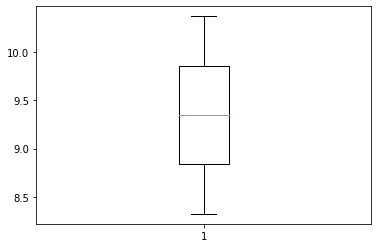

In [33]:
mlp_scores = cross_val_score(neural_Regressor, inputs, targets, cv=5)
print(mlp_scores)
targets.reshape(-1, 1)
neural_Outputs.reshape(-1, 1)
rf_Outputs.reshape(-1, 1)
##SVR_Outputs.reshape(-1, 1)
MSE_1 = mean_squared_error(targets, neural_Outputs)
print(MSE_1)

MSE_2 = mean_squared_error(targets, rf_Outputs)
print(MSE_2)

##MSE_3 = cross_val_score(SVR_Regressor, targets, scaled, cv=5)
##print(MSE_3)

plot_data = list()
plot_data.append(MSE_1)
plot_data.append(MSE_2)
##plot_data.append(MSE_3)


# Creating plot
plt.boxplot(plot_data)
 
# show plot
plt.show()
